In [87]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [88]:
import warnings
warnings.simplefilter(action='ignore')

In [89]:
df=pd.read_excel('train(1).xlsx')

In [90]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [91]:
df.shape

(16209, 21)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [93]:
df.duplicated().sum()

0

In [94]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Target variable analysis (EDA)

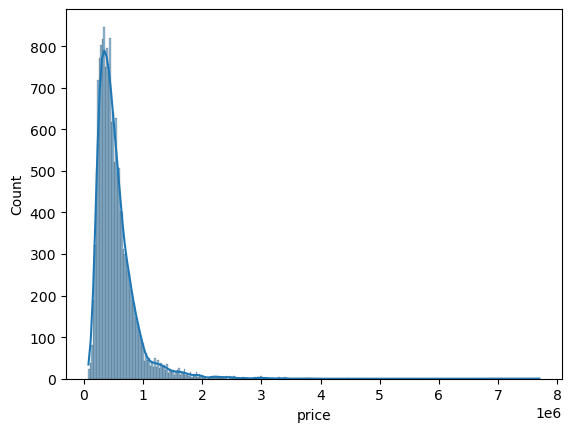

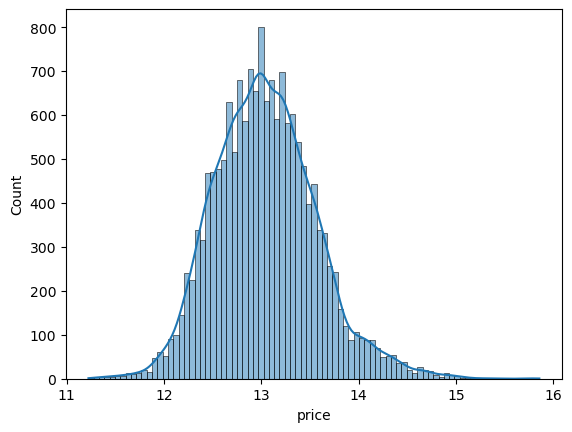

In [96]:
sns.histplot(df['price'], kde=True)
plt.show()

sns.histplot(np.log(df['price']), kde=True)
plt.show()

- **price** is right-skewed  
- Log transform stabilizes variance → improves RMSes

- # Relationship between target and key features

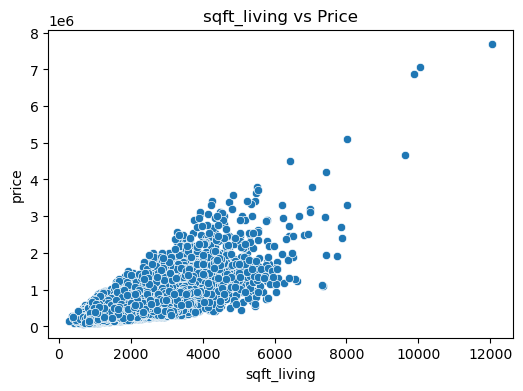

In [99]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title('sqft_living vs Price')
plt.show()

- *price* increases with living area; however, few points deviate from the trend

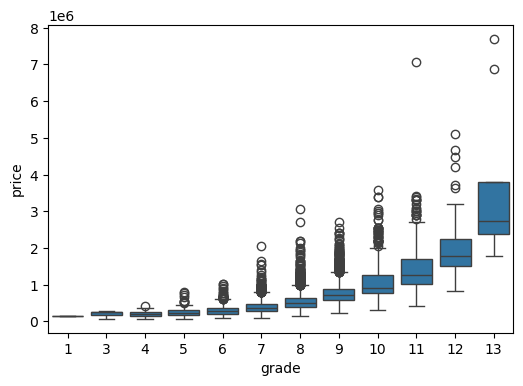

In [101]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['grade'], y=df['price'])
plt.show()

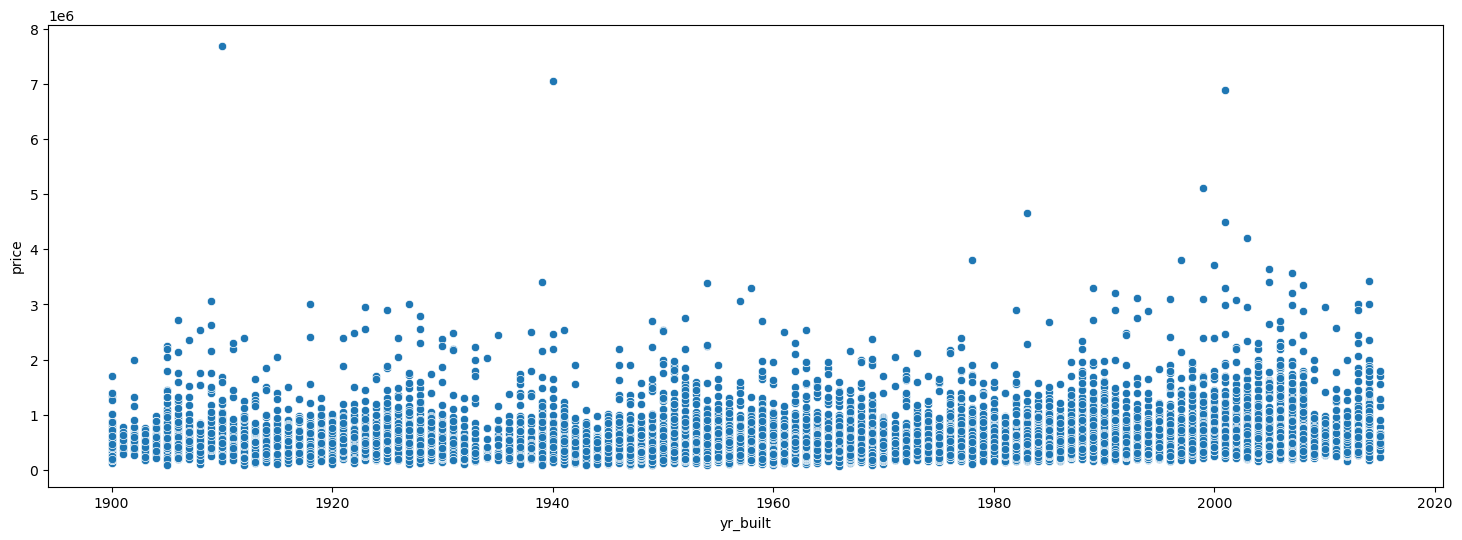

In [102]:
plt.figure(figsize=(18,6))
sns.scatterplot(x=df['yr_built'], y=df['price'])
plt.show()

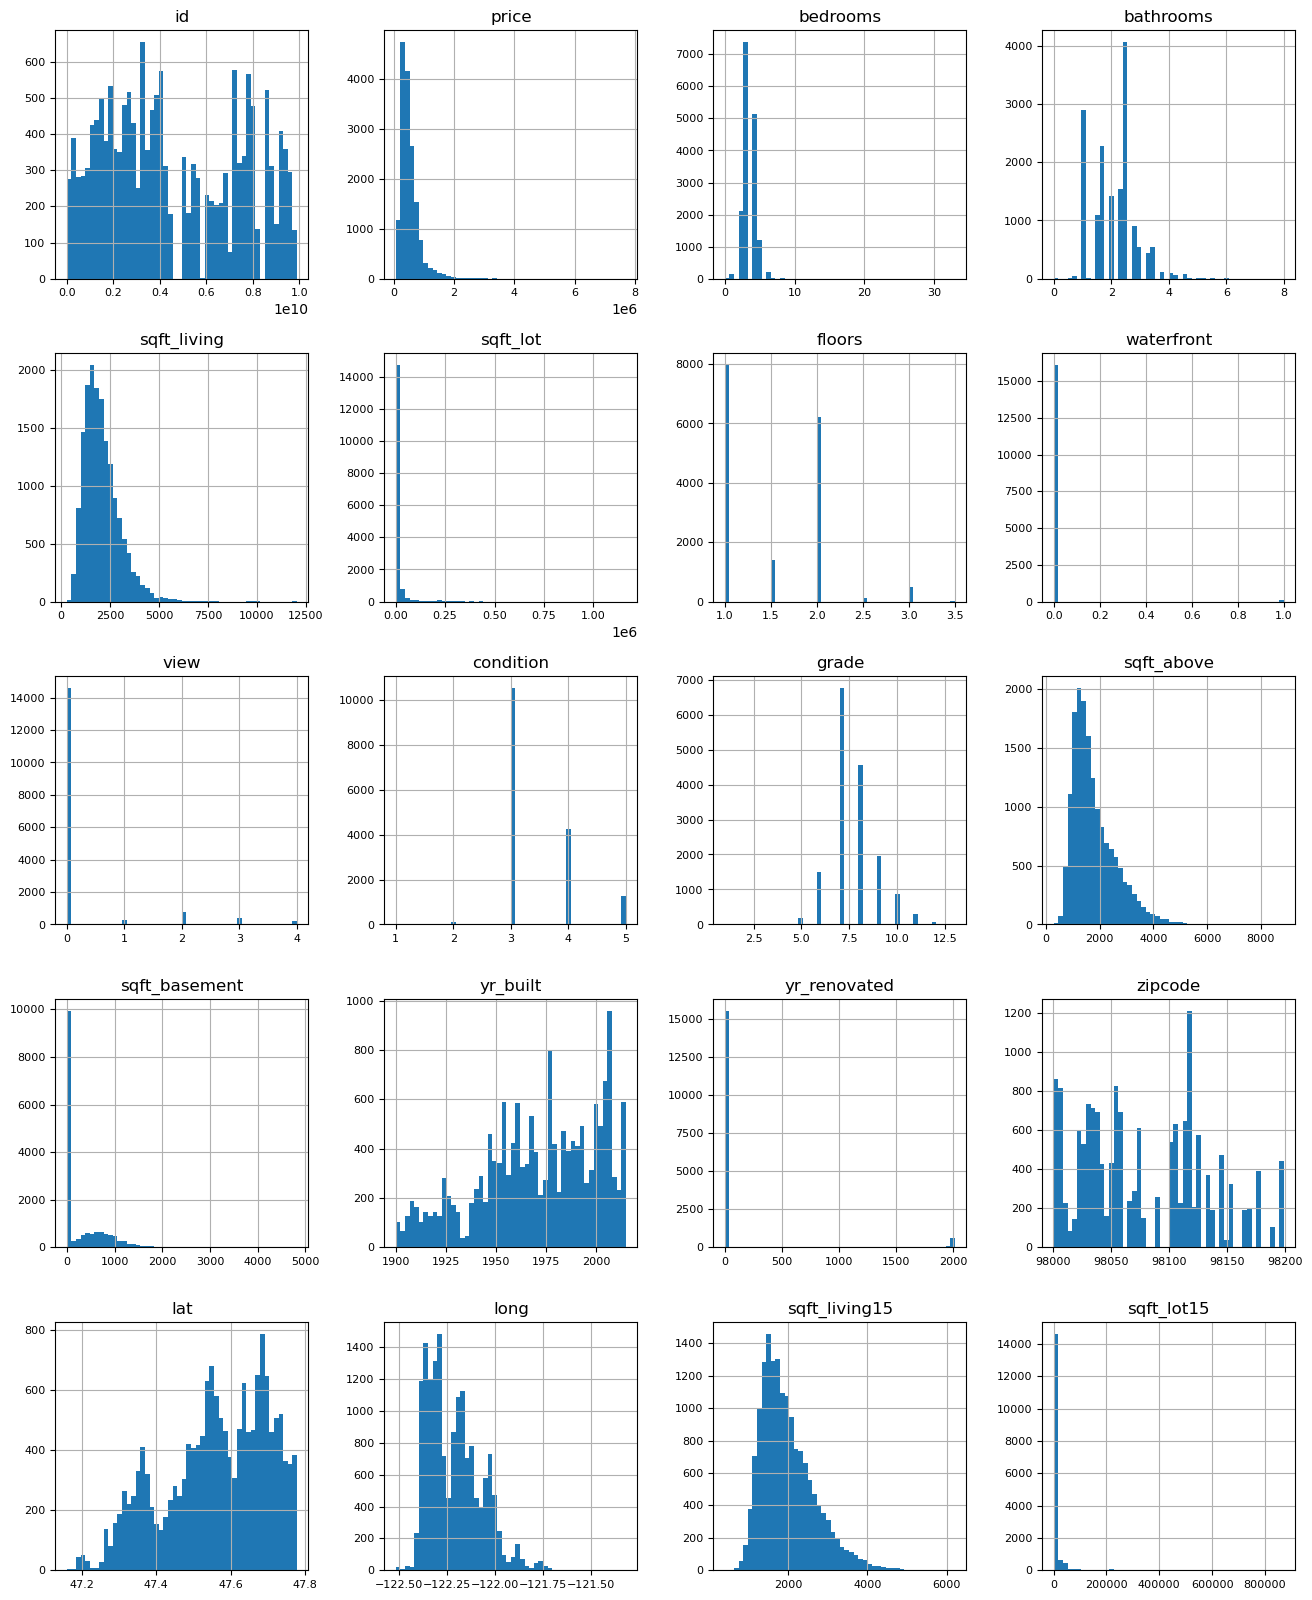

In [103]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Preprocessing before final model building

In [105]:
df['date'] = pd.to_datetime(df['date'])

In [106]:
df['year_sold']=df['date'].dt.year

In [107]:
df['HouseAge'] = df['year_sold'] - df['yr_built']

In [108]:
from scipy.stats import skew

skewed_feats = df.select_dtypes(include=np.number).apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats = skewed_feats[skewed_feats > 0.75].index

df[skewed_feats] = np.log1p(df[skewed_feats])

- # Evaluate Different Models

Since total living area already captures basement contribution, redundant area-based features were removed to reduce multicollinearity

In [111]:
cols_to_drop = [
    'id',
    'date',
    'sqft_basement',
    'yr_renovated',#it contains mostly 0 and was not helping in prediction
    'long',
    'year_sold'
]

# drop only if column exists (safe practice)
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])


In [112]:
X = df.drop('price', axis=1)
y = df['price']

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [114]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'zipcode', 'lat', 'sqft_living15', 'sqft_lot15', 'HouseAge'],
      dtype='object')

- # Random Forest

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train, y_train)

# Predict on validation set
y_pred = rf.predict(X_test)

# Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

rmse_rf, r2_rf


(0.19359697591049102, 0.8641808742378786)

# Ridege Model

In [118]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge needs scaling → use Pipeline
ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=15))
])

# Train
ridge_model.fit(X_train, y_train)

# Predict
y_pred = ridge_model.predict(X_test)

# Metrics
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
r2_ridge = r2_score(y_test, y_pred)

rmse_ridge, r2_ridge


(0.24998223468405345, 0.7735449111077142)

# Xgboost Model

In [120]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror',
    n_jobs=-1
)

# Train
xgb.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb.predict(X_test)

# Metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)

rmse_xgb, r2_xgb


(0.17415541637268, 0.8900898591844728)

# Lightgbm Model

In [122]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train
lgbm.fit(X_train, y_train)

# Predict on validation set
y_pred = lgbm.predict(X_test)

# Metrics
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lgb = r2_score(y_test, y_pred)

rmse_lgb, r2_lgb


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1902
[LightGBM] [Info] Number of data points in the train set: 12967, number of used features: 16
[LightGBM] [Info] Start training from score 13.043961


(0.16717775949794866, 0.8987206760847083)

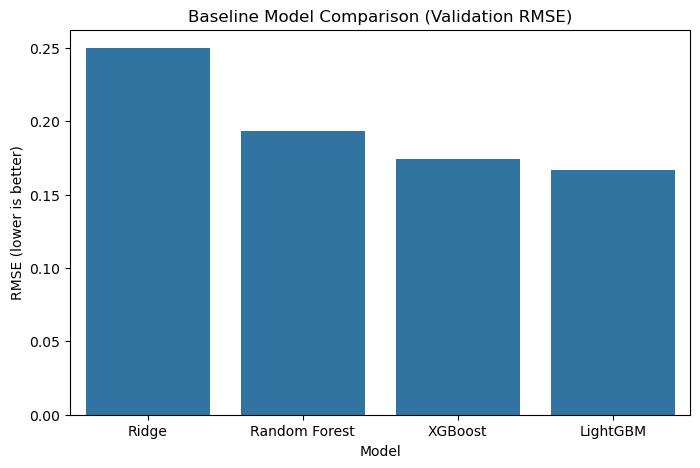

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Ridge', 'Random Forest', 'XGBoost', 'LightGBM']
rmse_scores = [rmse_ridge, rmse_rf, rmse_xgb, rmse_lgb]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=rmse_scores)

plt.ylabel('RMSE (lower is better)')
plt.xlabel('Model')
plt.title('Baseline Model Comparison (Validation RMSE)')

plt.show()


📊 Baseline Model Performance Summary

We evaluated multiple tabular regression models using validation RMSE as the primary metric (lower is better). The results are summarized below:

Ridge Regression shows the weakest performance, indicating that a purely linear model is insufficient to capture the complex, non-linear relationships present in real estate pricing data.

Random Forest improves significantly over Ridge by modeling non-linear interactions, but its performance is limited due to its bagging-based nature.

XGBoost further reduces RMSE by leveraging gradient boosting, allowing the model to iteratively correct residual errors.

LightGBM achieves the best performance, delivering the lowest RMSE among all baseline models due to its efficient histogram-based boosting and strong handling of feature interaction

In [153]:
import joblib

# Save model
joblib.dump(lgbm, "lgbm_tabular_model.pkl")


['lgbm_tabular_model.pkl']